# How to plot a ChIP-Seq average signal in its genomic context  ? 

Please use the next cell to adjust the two following variables according to your installation: 
- path to GRATIOSA package
- path to database

In [1]:
import sys
## PATH TO PACKAGE:
## ----------------
## IF ALREADY IN YOUR PYTHON PATH (e.g. installation through Pip): nothing to do
## IF NOT IN YOUR PYTHON PATH (e.g. download from GitHub): 
## uncomment and adjust the following relevant line to the location of the GRATIOSA directory
## - For Linux/MacOS:             typical style ;-)
#sys.path.append('/home/usr/Python_venv/lib/python3.8/site-packages/') 
# sys.path.insert(0,"/home/s/Téléchargements/GRATIOSA-master/")
#sys.path.append("/home/s/Downloads/GRATIOSA-master/")
## (- For Windows:                  typical style ;-)
#sys.path.append('C:\\Downloads\\GRATIOSA-master')


import os
## PATH TO DATABASE:
## -----------------
## FOR REGULAR USE OF THE PACKAGE:
#  Please set your system environment variable \$GRATIOSA_DB_PATH in order to have 
#  \$GRATIOSA_DB_PATH + data/organisms (e.g. export GRATIOSA_DB_PATH=/home/usr/documents/GRATIOSA/).
## FOR THIS TUTORIAL ONLY:
#  you can skip the system environment variable and just use the following line
#  We assume that the "data" directory containing the database is in the parent directory (otherwise adjust line)
os.environ["GRATIOSA_DB_PATH"]=os.getcwd()+"/../"
print("Please check that the database is stored in: %s"%(os.environ["GRATIOSA_DB_PATH"]))

Please check that the database is stored in: /home/s/maiwenn_PhD/article_GRATIOSA/test_GRATIOSA/GRATIOSA-master/tutorials/../


In [1]:
# Loading the modules for data loading
from GRATIOSA import Genome, Chipseq

# Loading the statistical analysis and graphic modules
from GRATIOSA import stat_analysis, plot_stat_analysis, plot_genome
import numpy as np

## 1 - Data loading
#### Genomic annotation loading

In [2]:
g = Genome.Genome("ecoli_W3110_Mu")
g.load_annotation()

Detected a genome with 1 chromosome
Chromosome NC_007779.1_w3110_Mu of length 4647454
Sequence of organism ecoli_W3110_Mu loaded
Trying to load annotation from: /home/s/topo_data/data/ecoli_W3110_Mu/annotation/sequence.gff3
Annotation of ecoli_W3110_Mu loaded
Number of genes: 4312


### 2 - ChipSeq signal loading and simple plotting

In [2]:
# Initialization of the Chipseq object
ch = Chipseq.Chipseq(g)
ch.load_signal()

NameError: name 'Chipseq' is not defined

In [ ]:
plot_genome.plot_region(g,beg=10000,end = 15000,
                        signals_cond=["Sutormin_TopoI_R1", "Sutormin_Gyrase_R1"],
                        gene_names = True, 
                        hratios = [1.5,2,2],
                        S_ylabels=['TopoI','Gyrase'],
                        hspace=0.05,
                        figsize=(5,3),
                        output_file=f"genomic_plot_TopoI_Gyrase_raw",
                        file_extension='.pdf',
                        ch_object=ch
                       )

### 3 - ChipSeq signal averaging and smoothing among replicates for graph improvement

In [3]:
# Selection of replicates for each signal type
cond = {"Topo": ["Sutormin_TopoI_R1", "Sutormin_TopoI_R2", "Sutormin_TopoI_R3"],
        "Gyr": ["Sutormin_Gyrase_R1", "Sutormin_Gyrase_R2"]}  

# The load_signal_average method performs the following two steps:
# 1 - Processes each replicate (here, smoothing with a chosen window size)
# 2 - Calculates the average signal between replicates for each genomic position
smooth_window = 100  # Choice of the window size (in b) for smoothing
for styp in cond.keys():
    ch.load_signals_average(list_cond=cond[styp],
                            average_name=f"{styp}_smooth{smooth_window}b",
                            data_treatment="smoothing",
                            window=smooth_window)

performing the average
data_treatment: smoothing
Condition:Sutormin_TopoI_R1_smooth100b
performing the smoothing
Loading condition Sutormin_TopoI_R1
Condition:Sutormin_TopoI_R2_smooth100b
performing the smoothing
Loading condition Sutormin_TopoI_R2
Condition:Sutormin_TopoI_R3_smooth100b
performing the smoothing
Loading condition Sutormin_TopoI_R3
performing the average
data_treatment: smoothing
Condition:Sutormin_Gyrase_R1_smooth100b
performing the smoothing
Loading condition Sutormin_Gyrase_R1
Condition:Sutormin_Gyrase_R2_smooth100b
performing the smoothing
Loading condition Sutormin_Gyrase_R2


Saved as /home/s/topo_data/resdir/Genome_plot/genomic_plot_TopoI_Gyrase.pdf


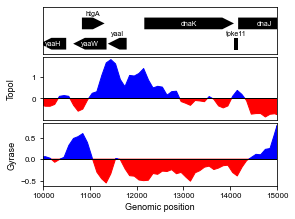

In [4]:
plot_genome.plot_region(g,beg=10000,end = 15000,
                        signals_cond=[f"Topo_smooth{smooth_window}b",f"Gyr_smooth{smooth_window}b"],
                        gene_names = True, 
                        hratios = [1.5,2,2],
                        S_ylabels=['TopoI','Gyrase'],
                        hspace=0.05,
                        figsize=(5,3),
                        output_file=f"genomic_plot_TopoI_Gyrase",
                        file_extension='.pdf',
                        ch_object=ch
                       )

See the function description for arguments selection.

In [ ]:
help(plot_genome.plot_region)